In [57]:
import pathlib
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc
from tensorflow.keras import datasets, layers, models
import tensorflow as tf



In [85]:
#defining some parameters
batch_size = 32
img_height = 128
img_width = 128

In [86]:
#gathering the data and separating into training and validation datasets
data_dir = 'data/images/archive/'
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.5,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 20000 files belonging to 2 classes.
Using 10000 files for training.


In [87]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.5,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 20000 files belonging to 2 classes.
Using 10000 files for validation.


In [88]:
#The features
class_names = train_ds.class_names
print(class_names)


['with_mask', 'without_mask']


In [89]:
#Designing the CNN
model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2,activation = 'softmax'))

In [90]:
#Compiling the model
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy'])


In [91]:
#Training the model
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=1, 
  shuffle=True
)


313/313 [==============================] - 2550s 8s/step - loss: 33.5731 - accuracy: 0.9160 - val_loss: 0.0040 - val_accuracy: 0.9987


In [65]:
import cv2 as cv

In [92]:
#Function which when given an image from the dataset 
#it outputs the image and the prediction for the image
def predictions(img="with_mask/with-mask-default-mask-seed5777.png"):
    img_path = "data/images/archive/" + img
    image1 = cv.imread(img_path)
    image1 = cv.cvtColor(image1, cv.COLOR_BGR2RGB )
    image1= cv.resize(image1, (img_height,img_width), interpolation = cv.INTER_AREA)
    img = image.load_img(img_path, target_size=(img_height, img_width))
    plt.imshow(image1)
    plt.show()
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    tf.image.rgb_to_grayscale(img_batch)
    prediction = model.predict(img_batch)
    print(class_names[np.argmax(prediction)])

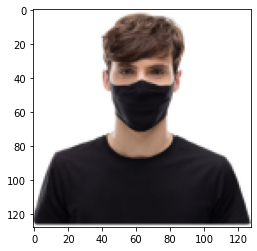

without_mask
[[0.46391478 0.5360851 ]]
['with_mask', 'without_mask']


In [110]:
from tensorflow.keras.preprocessing import image
image1 = cv.imread('data/images/mask3')
image1 = cv.cvtColor(image1, cv.COLOR_BGR2RGB )
image1 = cv.resize(image1, (img_height,img_width), interpolation = cv.INTER_AREA)
plt.imshow(image1)
plt.show()
img_array = image.img_to_array(image1)
img_array = img_array/255.0
img_batch = np.expand_dims(img_array, axis=0)
prediction = model.predict(img_batch)
print(class_names[np.argmax(prediction[0])])
print(prediction)
print(class_names)


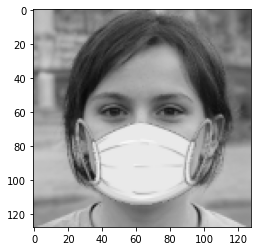

with_mask


In [108]:
predictions("with_mask/with-mask-default-mask-seed2322.png")
